In [1]:
from fastai.vision import *
import h5py

In [2]:
class H5pyList(ImageList):
    def __init__(self, *args, file=None, key=None, **kwargs):
        super().__init__(*args, **kwargs)
        if file == None or key == None:
            raise ValueError('file and key must be defined')
        self.file,self.key = file,key
    
    def get(self, i):
        return Image(tensor(self.file[self.key][self.items[i]]))
     
    def new(self, items, processor=None, **kwargs):
        res = super().new(items,processor, file=self.file, key=self.key, **kwargs)
        return res
    
    def label_from_key(self, key, **kwargs):
        return self._label_from_list([self.file[key][i] for i in self.items], **kwargs)
     
    @classmethod
    def from_file(cls, fpath, key=None, idxs=None, **kwargs):
        fpath = Path(fpath)
        file = h5py.File(fpath.name, 'r')
        key = ifnone(key, list(file.keys())[0])
        items = ifnone(idxs, list(range(len(file[key]))))
        return cls(items, path=fpath.parent, file=file, key=key, **kwargs)
        
        

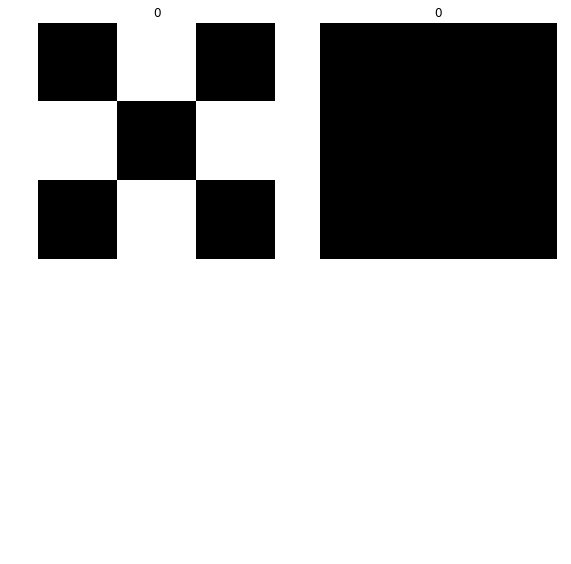

In [3]:
il = (H5pyList.from_file('test.h5py').split_by_rand_pct(.2)
      .label_from_key('labels')).databunch(bs=2)
il.show_batch()

In [4]:
learner = cnn_learner(il, models.resnet34)

In [20]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,time
0,0.000000,0.000000,00:00
1,0.000000,0.000000,00:00
2,0.000000,0.000000,00:00


In [22]:
learner.get_preds(ds_type=DatasetType.Train)

[tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]), tensor([0, 0, 0, 0, 0, 0, 0, 0])]

In [12]:
data = [[[0,255,0],[255,0,255],[0,255,0]],
        [[0,255,0],[255,0,255],[0,255,0]],
        [[0,255,0],[255,0,255],[0,255,0]]]


In [17]:
with h5py.File('test.h5py') as f:
    f.create_dataset('images', dtype='float32', data= np.array([data] * 10))
    f.create_dataset('labels', data=[0] * 10)

In [23]:
??ImageList

In [ ]:
def test(hello=0, *myargs, **kwargs):
    import pdb;pdb.set_trace()
    20==20